In [87]:
import pandas as pd
from datetime import datetime, timedelta
from urllib.request import Request, urlopen
import json
import os
import numpy as np
import matplotlib.pyplot as plt

def read_json(url):
    request = Request(url)
    response = urlopen(request)
    data = response.read()
    url2 = json.loads(data)
    return url2

api_key = os.getenv("CC_API")
ticker_list = ['BTC', 'LTC', 'ETH', 'ZEC', 'XRP']
group_df = pd.DataFrame()

for ticker in ticker_list:
    url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={ticker}&tsym=USD&allData=true&api_key={api_key}"
    raw_data = read_json(url)
    df = pd.DataFrame(raw_data['Data']['Data'])
    df['time'] = pd.to_datetime(df['time'],unit='s')
    df.set_index(df['time'], inplace=True)
    df['close'] = df['close'].astype(float)
    group_df[ticker] = df['close']

print(group_df.head())
print(group_df.tail())

                BTC  LTC  ETH  ZEC  XRP
time                                   
2010-07-17  0.04951  0.0  0.0  0.0  0.0
2010-07-18  0.08584  0.0  0.0  0.0  0.0
2010-07-19  0.08080  0.0  0.0  0.0  0.0
2010-07-20  0.07474  0.0  0.0  0.0  0.0
2010-07-21  0.07921  0.0  0.0  0.0  0.0
                 BTC    LTC     ETH    ZEC     XRP
time                                              
2019-09-13  10372.29  69.05  181.52  44.75  0.2560
2019-09-14  10365.56  70.88  188.65  46.41  0.2622
2019-09-15  10313.02  70.13  189.24  46.64  0.2608
2019-09-16  10271.79  72.95  197.63  48.71  0.2615
2019-09-17  10238.54  75.06  209.63  50.89  0.2897


In [63]:
BTC_df = group_df['BTC']
BTC_df.head()

time
2010-07-17    0.04951
2010-07-18    0.08584
2010-07-19    0.08080
2010-07-20    0.07474
2010-07-21    0.07921
Name: BTC, dtype: float64

In [64]:
BTC_df.tail()

time
2019-09-13    10372.29
2019-09-14    10365.56
2019-09-15    10313.02
2019-09-16    10271.79
2019-09-17    10263.31
Name: BTC, dtype: float64

In [65]:
LTC_df = group_df['LTC']
LTC_df.head()


time
2010-07-17    0.0
2010-07-18    0.0
2010-07-19    0.0
2010-07-20    0.0
2010-07-21    0.0
Name: LTC, dtype: float64

In [66]:
LTC_df.tail()


time
2019-09-13    69.05
2019-09-14    70.88
2019-09-15    70.13
2019-09-16    72.95
2019-09-17    75.05
Name: LTC, dtype: float64

In [67]:
LTC_df = LTC_df.replace(0, np.nan)
LTC_df = LTC_df.dropna(how='all', axis=0)
LTC_df.head()

time
2013-09-29    2.590
2013-09-30    2.554
2013-10-01    2.666
2013-10-02    2.337
2013-10-03    2.502
Name: LTC, dtype: float64

In [68]:
ETH_df = group_df['ETH']
ETH_df.head()

time
2010-07-17    0.0
2010-07-18    0.0
2010-07-19    0.0
2010-07-20    0.0
2010-07-21    0.0
Name: ETH, dtype: float64

In [69]:
ETH_df.tail()

time
2019-09-13    181.52
2019-09-14    188.65
2019-09-15    189.24
2019-09-16    197.63
2019-09-17    209.14
Name: ETH, dtype: float64

In [70]:
ETH_df = ETH_df.replace(0, np.nan)
ETH_df = ETH_df.dropna(how='all', axis=0)
ETH_df.head()

time
2015-08-07    2.7730
2015-08-08    0.8076
2015-08-09    0.7428
2015-08-10    0.6846
2015-08-11    1.0590
Name: ETH, dtype: float64

In [71]:
ZEC_df = group_df['ZEC']
ZEC_df.head()

time
2010-07-17    0.0
2010-07-18    0.0
2010-07-19    0.0
2010-07-20    0.0
2010-07-21    0.0
Name: ZEC, dtype: float64

In [72]:
ZEC_df.tail()

time
2019-09-13    44.75
2019-09-14    46.41
2019-09-15    46.64
2019-09-16    48.71
2019-09-17    51.28
Name: ZEC, dtype: float64

In [73]:
ZEC_df = ZEC_df.replace(0, np.nan)
ZEC_df = ZEC_df.dropna(how='all', axis=0)
ZEC_df.head()

time
2016-10-28    19077.47
2016-10-29     1996.14
2016-10-30      536.27
2016-10-31     1632.09
2016-11-01     1359.77
Name: ZEC, dtype: float64

In [74]:
XRP_df = group_df['XRP']
XRP_df.head()

time
2010-07-17    0.0
2010-07-18    0.0
2010-07-19    0.0
2010-07-20    0.0
2010-07-21    0.0
Name: XRP, dtype: float64

In [75]:
XRP_df = XRP_df.replace(0, np.nan)
XRP_df = XRP_df.dropna(how='all', axis=0)
XRP_df.head()

time
2015-01-21    0.01523
2015-01-22    0.01602
2015-01-23    0.01600
2015-01-24    0.01739
2015-01-25    0.01700
Name: XRP, dtype: float64

In [180]:
  
def mcs_brownian (df, num_simulations):
# Monte Carlo Simulation with Geometric Brownian Motion
# simulated_price = previous_day_price * exp((daily_returns_mean - ((daily_std_mean**2)/2)) + (daily_std_mean * random_noise ))
    
    daily_returns_df = df.pct_change()
    #daily_returns_mean = daily_returns_df.mean()
    #daily_std_mean = daily_returns_df.std()
    log_returns_df = np.log(1 + daily_returns_df).dropna()
    log_returns_mean = log_returns_df.mean()
    log_returns_std = log_returns_df.std()
    
    simulations = num_simulations
    trading_days = 252
    df_last_price = df[-1]
    timestep = 1
    
    simulated_price_df = pd.DataFrame()
    portfolio_cumulative_returns = pd.DataFrame()
    
    for n in range(simulations):
        
        simulated_prices = [df_last_price]
        
        for i in range (trading_days):
            drift = log_returns_mean - (0.5*log_returns_std**2)* timestep
            random_noise = np.random.normal()
            diffusion = (log_returns_std * random_noise * timestep ** 0.5)
    
    
            simulated_price = simulated_prices[-1] * np.exp(drift + diffusion)
            simulated_prices.append(simulated_price)
            
        simulated_price_df = pd.Series(simulated_prices)
        simulated_daily_returns = simulated_price_df.pct_change()

        portfolio_cumulative_returns[n] = (1 + simulated_daily_returns.fillna(0)).cumprod()
    return portfolio_cumulative_returns

In [181]:
simulated_BTC_df = mcs_brownian(BTC_df, 100)

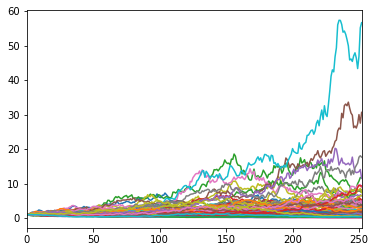

In [182]:
simulated_BTC_df.plot(legend = None)

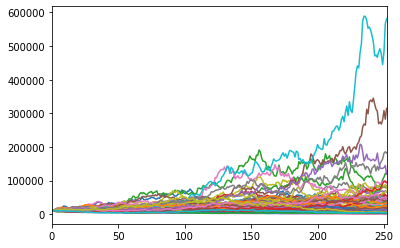

In [183]:
simulated_BTC_price = simulated_BTC_df.multiply(BTC_df[-1])
simulated_BTC_price.plot(legend = None)

In [184]:
ending_simulated_BTC_returns = simulated_BTC_df.iloc[-1, :]
ending_simulated_BTC_returns.head()

0    3.641841
1    7.530198
2    1.239824
3    1.542852
4    4.742647
Name: 252, dtype: float64

In [185]:
confidence_interval = ending_simulated_BTC_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025     0.220752
0.975    14.819367
Name: 252, dtype: float64

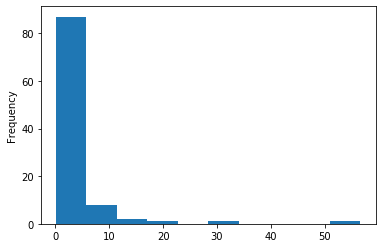

In [186]:
ending_simulated_BTC_returns.plot(kind='hist', bins=10)

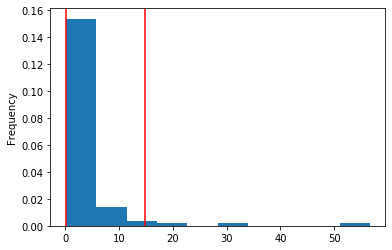

In [187]:
plt.figure();
ending_simulated_BTC_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [188]:
simulated_LTC_df = mcs_brownian(LTC_df, 100)


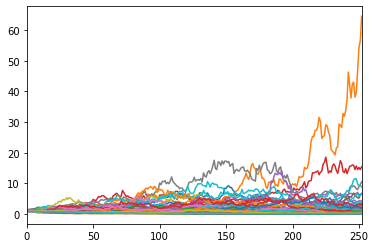

In [189]:
simulated_LTC_df.plot(legend = None)

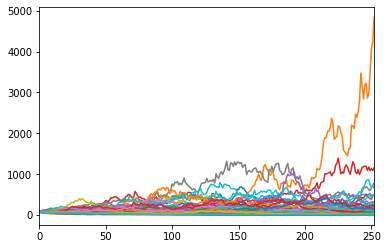

In [190]:
simulated_LTC_price = simulated_LTC_df.multiply(LTC_df[-1])
simulated_LTC_price.plot(legend = None)

In [193]:
ending_simulated_LTC_returns = simulated_LTC_df.iloc[-1, :]
ending_simulated_LTC_returns.head()

0    0.700917
1    0.246783
2    0.803049
3    1.022343
4    0.238465
Name: 252, dtype: float64

In [194]:
confidence_interval = ending_simulated_LTC_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.050958
0.975    9.679399
Name: 252, dtype: float64

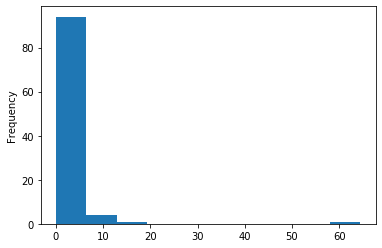

In [195]:
ending_simulated_LTC_returns.plot(kind='hist', bins=10)

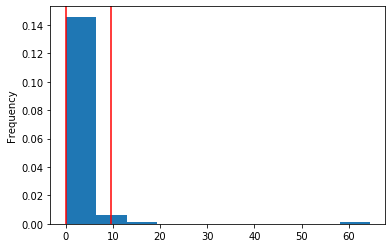

In [196]:
plt.figure();
ending_simulated_LTC_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

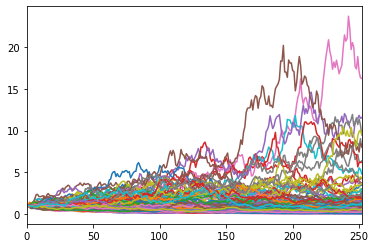

In [197]:
simulated_ETH_df = mcs_brownian(ETH_df, 100)
simulated_ETH_df.plot(legend = None)

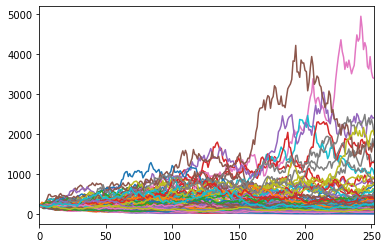

In [198]:
simulated_ETH_price = simulated_ETH_df.multiply(ETH_df[-1])
simulated_ETH_price.plot(legend = None)

In [199]:
ending_simulated_ETH_returns = simulated_ETH_df.iloc[-1, :]
ending_simulated_ETH_returns.head()

0    2.786893
1    1.572532
2    0.459279
3    4.300717
4    3.480355
Name: 252, dtype: float64

In [200]:
confidence_interval = ending_simulated_ETH_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.071892
0.975    9.551054
Name: 252, dtype: float64

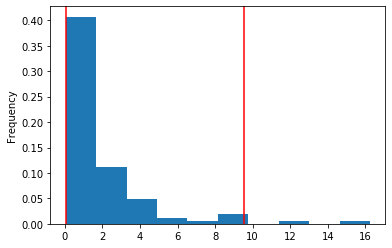

In [201]:
plt.figure();
ending_simulated_ETH_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

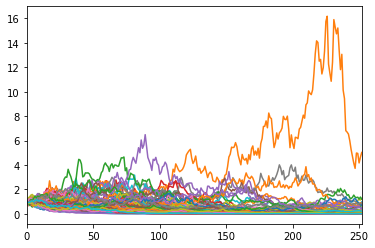

In [202]:
simulated_ZEC_df = mcs_brownian(ZEC_df, 100)
simulated_ZEC_df.plot(legend = None)

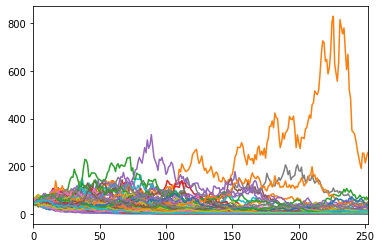

In [203]:
simulated_ZEC_price = simulated_ZEC_df.multiply(ZEC_df[-1])
simulated_ZEC_price.plot(legend = None)

In [204]:
ending_simulated_ZEC_returns = simulated_ZEC_df.iloc[-1, :]
ending_simulated_ZEC_returns.head()

0    0.111703
1    0.031273
2    0.011537
3    0.757475
4    0.188551
Name: 252, dtype: float64

In [205]:
confidence_interval = ending_simulated_ZEC_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.000734
0.975    1.099027
Name: 252, dtype: float64

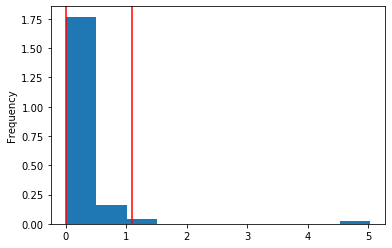

In [206]:
plt.figure();
ending_simulated_ZEC_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

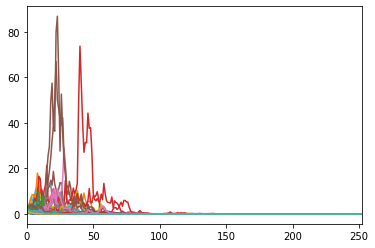

In [207]:
simulated_XRP_df = mcs_brownian(XRP_df, 100)
simulated_XRP_df.plot(legend = None)

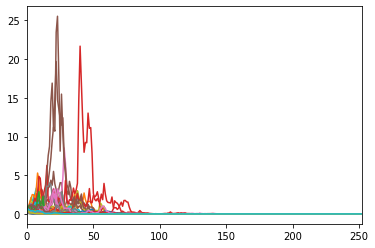

In [208]:
simulated_XRP_price = simulated_XRP_df.multiply(XRP_df[-1])
simulated_XRP_price.plot(legend = None)

In [209]:
ending_simulated_XRP_returns = simulated_XRP_df.iloc[-1, :]
ending_simulated_XRP_returns.head()

0    5.959890e-14
1    1.028542e-14
2    2.698447e-14
3    5.440405e-08
4    1.382939e-09
Name: 252, dtype: float64

In [210]:
confidence_interval = ending_simulated_XRP_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025    1.382730e-18
0.975    1.713785e-07
Name: 252, dtype: float64

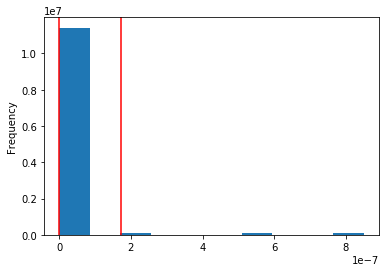

In [211]:
plt.figure();
ending_simulated_XRP_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [212]:
BTC_daily_returns_df = BTC_df.pct_change()
LTC_daily_returns_df = LTC_df.pct_change()
ETH_daily_returns_df = ETH_df.pct_change()
ZEC_daily_returns_df = ZEC_df.pct_change()
XRP_daily_returns_df = XRP_df.pct_change()


BTC_log_returns_df = np.log(1 + BTC_daily_returns_df).dropna()
LTC_log_returns_df = np.log(1 + LTC_daily_returns_df).dropna()
ETH_log_returns_df = np.log(1 + ETH_daily_returns_df).dropna()
ZEC_log_returns_df = np.log(1 + ZEC_daily_returns_df).dropna()
XRP_log_returns_df = np.log(1 + XRP_daily_returns_df).dropna()

BTC_log_returns_mean = BTC_log_returns_df.mean()
LTC_log_returns_mean = LTC_log_returns_df.mean()
ETH_log_returns_mean = ETH_log_returns_df.mean()
ZEC_log_returns_mean = ZEC_log_returns_df.mean()
XRP_log_returns_mean = XRP_log_returns_df.mean()

BTC_log_returns_std = BTC_log_returns_df.std()
LTC_log_returns_std = LTC_log_returns_df.std()
ETH_log_returns_std = ETH_log_returns_df.std()
ZEC_log_returns_std = ZEC_log_returns_df.std()
XRP_log_returns_std = XRP_log_returns_df.std()


    
simulations = 100
trading_days = 252
BTC_df_last_price = BTC_df[-1]
LTC_df_last_price = LTC_df[-1]
ETH_df_last_price = ETH_df[-1]
ZEC_df_last_price = ZEC_df[-1]
XRP_df_last_price = XRP_df[-1]

timestep = 1
    
simulated_crypto_index_price_df = pd.DataFrame()
crypto_portfolio_cumulative_returns = pd.DataFrame()
    
for n in range(simulations):
        
    simulated_BTC_prices = [BTC_df_last_price]
    simulated_LTC_prices = [LTC_df_last_price]
    simulated_ETH_prices = [ETH_df_last_price]
    simulated_ZEC_prices = [ZEC_df_last_price]
    simulated_XRP_prices = [XRP_df_last_price]



   
    for i in range (trading_days):
        
        BTC_drift = BTC_log_returns_mean - (0.5*BTC_log_returns_std**2)* timestep
        BTC_random_noise = np.random.normal()
        BTC_diffusion = (BTC_log_returns_std * BTC_random_noise * timestep ** 0.5)
        simulated_BTC_price = simulated_BTC_prices[-1] * np.exp(BTC_drift + BTC_diffusion)
        simulated_BTC_prices.append(simulated_BTC_price)
        
        LTC_random_noise = np.random.normal()
        LTC_drift = LTC_log_returns_mean - (0.5*LTC_log_returns_std**2)* timestep
        LTC_diffusion = (LTC_log_returns_std * LTC_random_noise * timestep ** 0.5)
        simulated_LTC_price = simulated_LTC_prices[-1] * np.exp(LTC_drift + LTC_diffusion)
        simulated_LTC_prices.append(simulated_LTC_price)
        
        ETH_random_noise = np.random.normal()
        ETH_drift = ETH_log_returns_mean - (0.5*ETH_log_returns_std**2)* timestep
        ETH_diffusion = (ETH_log_returns_std * ETH_random_noise * timestep ** 0.5)
        simulated_ETH_price = simulated_ETH_prices[-1] * np.exp(ETH_drift + ETH_diffusion)
        simulated_ETH_prices.append(simulated_ETH_price)
        
        ZEC_random_noise = np.random.normal()
        ZEC_drift = ZEC_log_returns_mean - (0.5*ZEC_log_returns_std**2)* timestep
        ZEC_diffusion = (ZEC_log_returns_std * ZEC_random_noise * timestep ** 0.5)
        simulated_ZEC_price = simulated_ZEC_prices[-1] * np.exp(ZEC_drift + ZEC_diffusion)
        simulated_ZEC_prices.append(simulated_ZEC_price)
        
        XRP_random_noise = np.random.normal()
        XRP_drift = XRP_log_returns_mean - (0.5*XRP_log_returns_std**2)* timestep
        XRP_diffusion = (XRP_log_returns_std * XRP_random_noise * timestep ** 0.5)
        simulated_XRP_price = simulated_XRP_prices[-1] * np.exp(XRP_drift + XRP_diffusion)
        simulated_XRP_prices.append(simulated_XRP_price)
    
    
    simulated_crypto_index_price_df['BTC prices'] = pd.Series(simulated_BTC_prices)
    simulated_crypto_index_price_df['LTC prices'] = pd.Series(simulated_LTC_prices)
    simulated_crypto_index_price_df['ETH prices'] = pd.Series(simulated_ETH_prices)
    simulated_crypto_index_price_df['ZEC prices'] = pd.Series(simulated_ZEC_prices)
    simulated_crypto_index_price_df['XRP prices'] = pd.Series(simulated_XRP_prices)

    
    simulated_crypto_index_daily_returns = simulated_crypto_index_price_df.pct_change()
    
    weights = [.8214, .0211, .1003, .00172, .05548 ]
    crypto_portfolio_daily_returns = simulated_crypto_index_daily_returns.dot(weights)

    

    crypto_portfolio_cumulative_returns[n] = (1 + crypto_portfolio_daily_returns.fillna(0)).cumprod()
    

In [213]:
crypto_portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.974191,0.991611,1.054044,1.061552,0.990551,1.007610,1.077062,1.038997,0.903014,0.998737,...,1.112943,0.895251,0.942415,0.950744,1.032690,0.954203,0.972405,0.991712,1.021229,0.950210
2,0.899217,0.949705,1.013580,0.961617,1.077330,1.056970,1.116896,1.065935,0.867380,1.027537,...,1.084138,0.966762,0.887813,0.938198,1.079853,0.923377,0.939981,0.920078,0.981940,0.912976
3,0.850026,0.941716,1.033593,0.940444,0.978937,1.069650,1.104529,1.176067,0.867018,1.011902,...,1.122775,0.958660,0.876817,1.025115,1.032797,1.050781,0.942992,0.942186,0.957506,0.943754
4,0.885790,0.893531,1.093009,0.928986,0.961148,1.092446,1.107511,1.248009,0.859894,0.965611,...,1.116898,0.880605,0.967010,1.093555,1.136763,1.069942,0.952038,0.914293,0.861304,0.940005


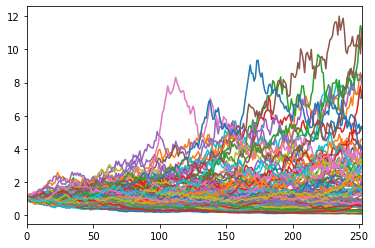

In [214]:
crypto_portfolio_cumulative_returns.plot(legend = None)

In [215]:
ending_crypto_portfolio_cumulative_returns = crypto_portfolio_cumulative_returns.iloc[-1, :]
ending_crypto_portfolio_cumulative_returns.head()

0    3.891726
1    1.542944
2    0.492187
3    0.427417
4    0.796203
Name: 252, dtype: float64

In [216]:
confidence_interval = ending_crypto_portfolio_cumulative_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025    0.172157
0.975    9.622676
Name: 252, dtype: float64

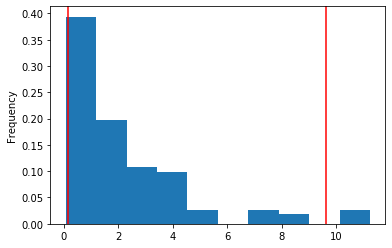

In [217]:
plt.figure();
ending_crypto_portfolio_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')